In [1]:
import json
import os
import random
random.seed(1066)

from collections import Counter

import numpy as np
import pandas as pd
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
import seaborn as sns

In [2]:
with open('data/sources/ohhla.rhymestats.json') as f:
    rhyme_stats = json.load(f)

In [3]:
print(list(rhyme_stats.keys())[:30])
print(len(rhyme_stats))

['EY1', 'IY1', 'AA1', 'AY1', 'AH1', '<unk>', 'EH1', 'UW1', 'AE1-AH0', 'OW1', 'ER1', 'EH1-ER0', 'AO1', 'AE1', 'EY1-AH0', 'UW1-IH0', 'IH1', 'AH1-IH0', 'AW1', 'EH1-AH0', 'AA1-IY0', 'AH1-IY0', 'AE1-IH0', 'UH1', 'AY1-ER0', 'IH1-ER0', 'IY1-IY0', 'AE1-ER0', 'IY1-AH0', 'ER1-IH0']
299


Plot *log(freq)~log(rank)* for one rhyme words in the original data:

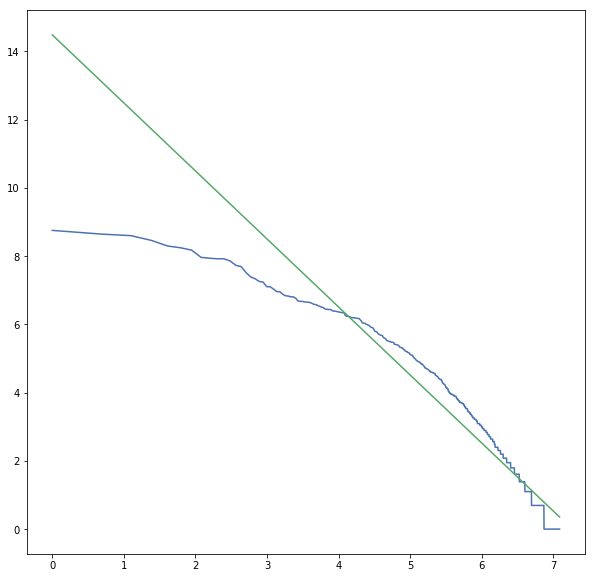

In [4]:
rhymes = []
for r, c in rhyme_stats['EY1'].items():
    rhymes.extend([r] * c)

freqs = [c for _, c in Counter(rhymes).most_common()]
xi = np.log(np.arange(1, len(freqs) + 1))

plt.figure(figsize=(10, 10))
log_freqs = np.log(np.array(freqs))
plt.plot(xi, log_freqs)

slope, intercept, r_value, p_value, std_err = stats.linregress(xi, log_freqs)
    
line = slope * xi + intercept
plt.plot(xi, line);

(Ignore the following block. Only for rendering a plot.)

,slope,diversity
count,64.000000,64.000000
mean,-1.133385,0.173672
std,0.225442,0.069521
min,-1.833092,0.037000
25%,-1.195128,0.136000
50%,-1.095444,0.174500
75%,-1.002578,0.211250
max,-0.770688,0.341000


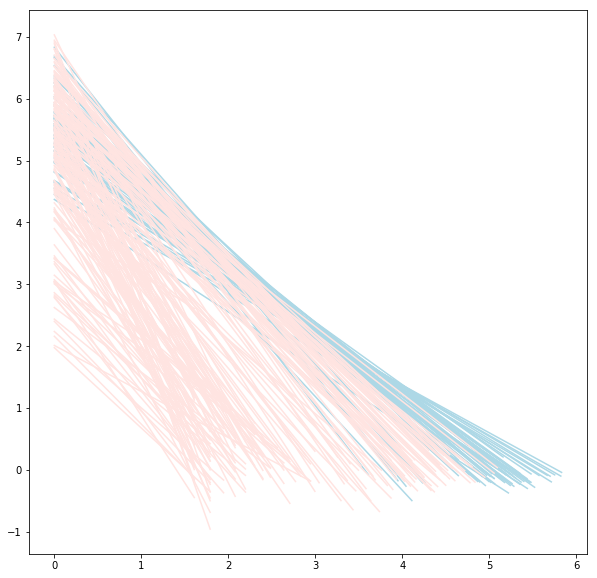

In [5]:
plt.figure(figsize=(10, 10))

n = 1000

families = []

for rhyme in rhyme_stats:
    if rhyme == '<unk>':
        continue
    
    rhymes = []
    for r, c in rhyme_stats[rhyme].items():
        rhymes.extend([r] * c)
    
    if len(rhymes) < 1000 or len(set(rhymes)) < 5:
        continue
    
    # sample n rhyme words from the family:
    random.shuffle(rhymes)
    rhymes = rhymes[:n]
    
    diversity = len(set(rhymes)) / len(rhymes)
    
    freqs = [c for _, c in Counter(rhymes).most_common()]
    xi = np.log(np.arange(1, len(freqs) + 1))
    log_freqs = np.log(np.array(freqs))

    slope, intercept, r_value, p_value, std_err = stats.linregress(xi, log_freqs)
    
    families.append(('auth', rhyme, slope, diversity))
    
    line = slope * xi + intercept
    plt.plot(xi, line, color='lightblue')

with open('data/sources/HybridLanguageModel.2018-08-15+12-35-02.rhymes.json') as f:
    char = json.load(f)
    
    char_families = []

    for rhyme in char['stats']:
        if rhyme == '<unk>':
            continue

        rhymes = []
        for r, c in char['stats'][rhyme].items():
            if r == '<unk>':
                continue
            rhymes.extend([r] * c)

        if not rhymes:
            continue

        diversity = len(set(rhymes)) / len(rhymes)

        freqs = [c for _, c in Counter(rhymes).most_common()]

        if len(freqs) < 5:
            continue

        xi = np.log(np.arange(1, len(freqs) + 1))
        log_freqs = np.log(np.array(freqs))

        slope, intercept, r_value, p_value, std_err = stats.linregress(xi, log_freqs)

        line = slope * xi + intercept
        plt.plot(xi, line, color='mistyrose')

families = pd.DataFrame.from_records(families, columns=('model', 'rhyme', 'slope', 'diversity'))
families.describe()

In [7]:
families.head(20)

,model,rhyme,slope,diversity
0,auth,EY1,-0.953176,0.240
1,auth,IY1,-0.973091,0.211
2,auth,AA1,-1.026988,0.221
3,auth,AY1,-1.102018,0.180
4,auth,AH1,-0.972999,0.188
5,auth,EH1,-0.989751,0.240
6,auth,UW1,-1.114163,0.158
7,auth,AE1-AH0,-0.827579,0.315
8,auth,OW1,-1.015391,0.212
9,auth,ER1,-1.180458,0.144


In [8]:
fns = ('data/sources/CharLanguageModel.2018-10-26+21-19-25.rhymes.json',
       'data/sources/HybridLanguageModel.2018-08-15+12-35-02.rhymes.json',
       'data/sources/RNNLanguageModel.2018-10-25+13-18-13.rhymes.json')

In [9]:
def get_family_records(fn):
    model_name = os.path.basename(fn)[:4].lower()
    with open(fn) as f:
        char = json.load(f)
    
    char_families = []

    for rhyme in char['stats']:
        if rhyme == '<unk>':
            continue

        rhymes = []
        for r, c in char['stats'][rhyme].items():
            if r == '<unk>':
                continue
            rhymes.extend([r] * c)

        if not rhymes:
            continue

        diversity = len(set(rhymes)) / len(rhymes)

        freqs = [c for _, c in Counter(rhymes).most_common()]

        if len(freqs) < 5:
            continue

        xi = np.log(np.arange(1, len(freqs) + 1))
        log_freqs = np.log(np.array(freqs))

        slope, intercept, r_value, p_value, std_err = stats.linregress(xi, log_freqs)

        line = slope * xi + intercept
        plt.plot(xi, line)

        char_families.append((model_name, rhyme, slope, diversity))
    
    return model_name, char_families

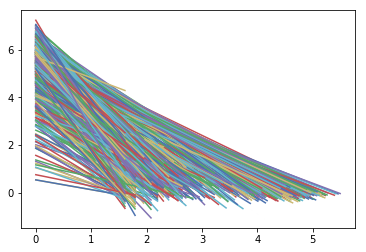

In [10]:
for fn in fns:
    model_name, char_records = get_family_records(fn)
    char_families = pd.DataFrame.from_records(char_records,
                                              columns=('model', 'rhyme', 'slope', 'diversity'))
    char_families.describe()
    families = families.append(char_families)

In [11]:
families.head(20)

,model,rhyme,slope,diversity
0,auth,EY1,-0.953176,0.240
1,auth,IY1,-0.973091,0.211
2,auth,AA1,-1.026988,0.221
3,auth,AY1,-1.102018,0.180
4,auth,AH1,-0.972999,0.188
5,auth,EH1,-0.989751,0.240
6,auth,UW1,-1.114163,0.158
7,auth,AE1-AH0,-0.827579,0.315
8,auth,OW1,-1.015391,0.212
9,auth,ER1,-1.180458,0.144


In [12]:
families.groupby('model').describe()

diversity                                                              \
          count      mean       std       min       25%       50%       75%   
model                                                                         
auth       64.0  0.173672  0.069521  0.037000  0.136000  0.174500  0.211250   
char      143.0  0.135732  0.147698  0.006693  0.043421  0.098765  0.152601   
hybr      167.0  0.086220  0.076824  0.006887  0.036018  0.064000  0.110932   
rnnl      181.0  0.095055  0.095771  0.005470  0.026022  0.072993  0.139506   

                 slope                                                    \
            max  count      mean       std       min       25%       50%   
model                                                                      
auth   0.341000   64.0 -1.133385  0.225442 -1.833092 -1.195128 -1.095444   
char   0.833333  143.0 -1.683108  0.655170 -4.025136 -2.030485 -1.483052   
hybr   0.500000  167.0 -1.895577  0.682544 -4.113877 -2.249261 -1.744568   
rnnl   0.750000  181.0 -1.722672  0.726382 -4.324002 -2.198592 -1.491741   

                           
            75%       max  
model                      
auth  -1.002578 -0.770688  
char  -1.219890 -0.410827  
hybr  -1.388101 -0.745057  
rnnl  -1.167913 -0.473553

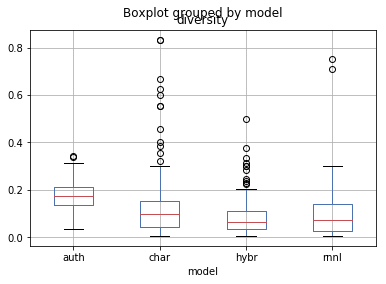

In [13]:
families.boxplot(column='diversity', by='model')

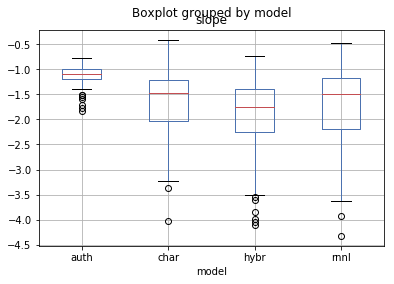

In [14]:
families.boxplot(column='slope', by='model')

In [15]:
families.groupby('model')['slope'].median()

model
auth   -1.095444
char   -1.483052
hybr   -1.744568
rnnl   -1.491741
Name: slope, dtype: float64

In [16]:
from itertools import combinations
from scipy.stats import wilcoxon

for a_, b_ in combinations(set(families['model']), 2):
    a = families[families['model'] == a_]
    b = families[families['model'] == b_]
    x = a.merge(b, on='rhyme', suffixes=('_left', '_right'))
    stat, p = wilcoxon(x['slope_left'], x['slope_right'])
    print(a_, 'vs', b_, '->', stat, p)

auth vs char -> 0.0 3.5254980732707397e-12
auth vs rnnl -> 439.0 5.8398482923347564e-05
auth vs hybr -> 2.0 5.690890720152127e-12
char vs rnnl -> 2503.0 1.1034337065959628e-06
char vs hybr -> 3655.0 0.26064629364294034
rnnl vs hybr -> 1647.0 2.965344173242513e-14


/Users/mikekestemont/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


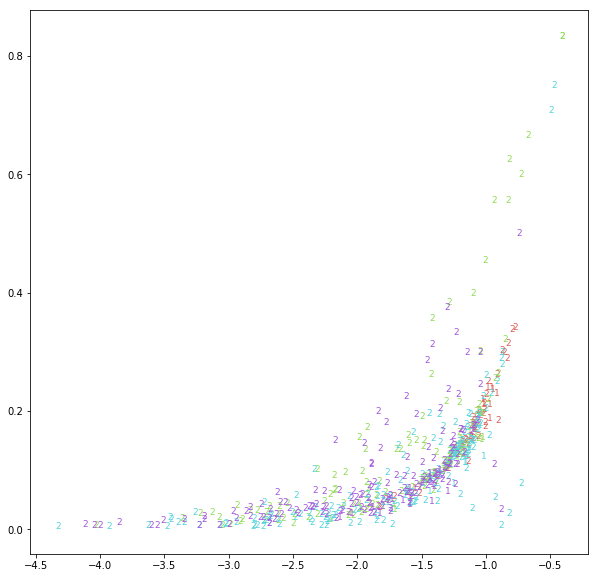

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))

models = tuple(set(families['model']))
cols = sns.color_palette("hls", len(models))

for idx, m in enumerate(models):
    d = families[families['model'] == m]
    d['nsyll'] = [r.count('-') + 1 for r in d['rhyme']]
    ax.scatter(d['slope'], d['diversity'], facecolors='none')
    for p1, p2, p3, rhyme in zip(d['slope'], d['nsyll'], d['diversity'], d['rhyme']):
        ax.text(p1, p3, str(p2), fontsize=9,
                ha='center', va='center', color=cols[idx])